In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
data=pd.read_csv("winequality-red(1).csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [116]:
data.shape

(1599, 12)

In [117]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [118]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [119]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [120]:
data["quality"]=data["quality"].map({5:0,6:0,4:0,3:0,7:1,8:1})

In [77]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [121]:
data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

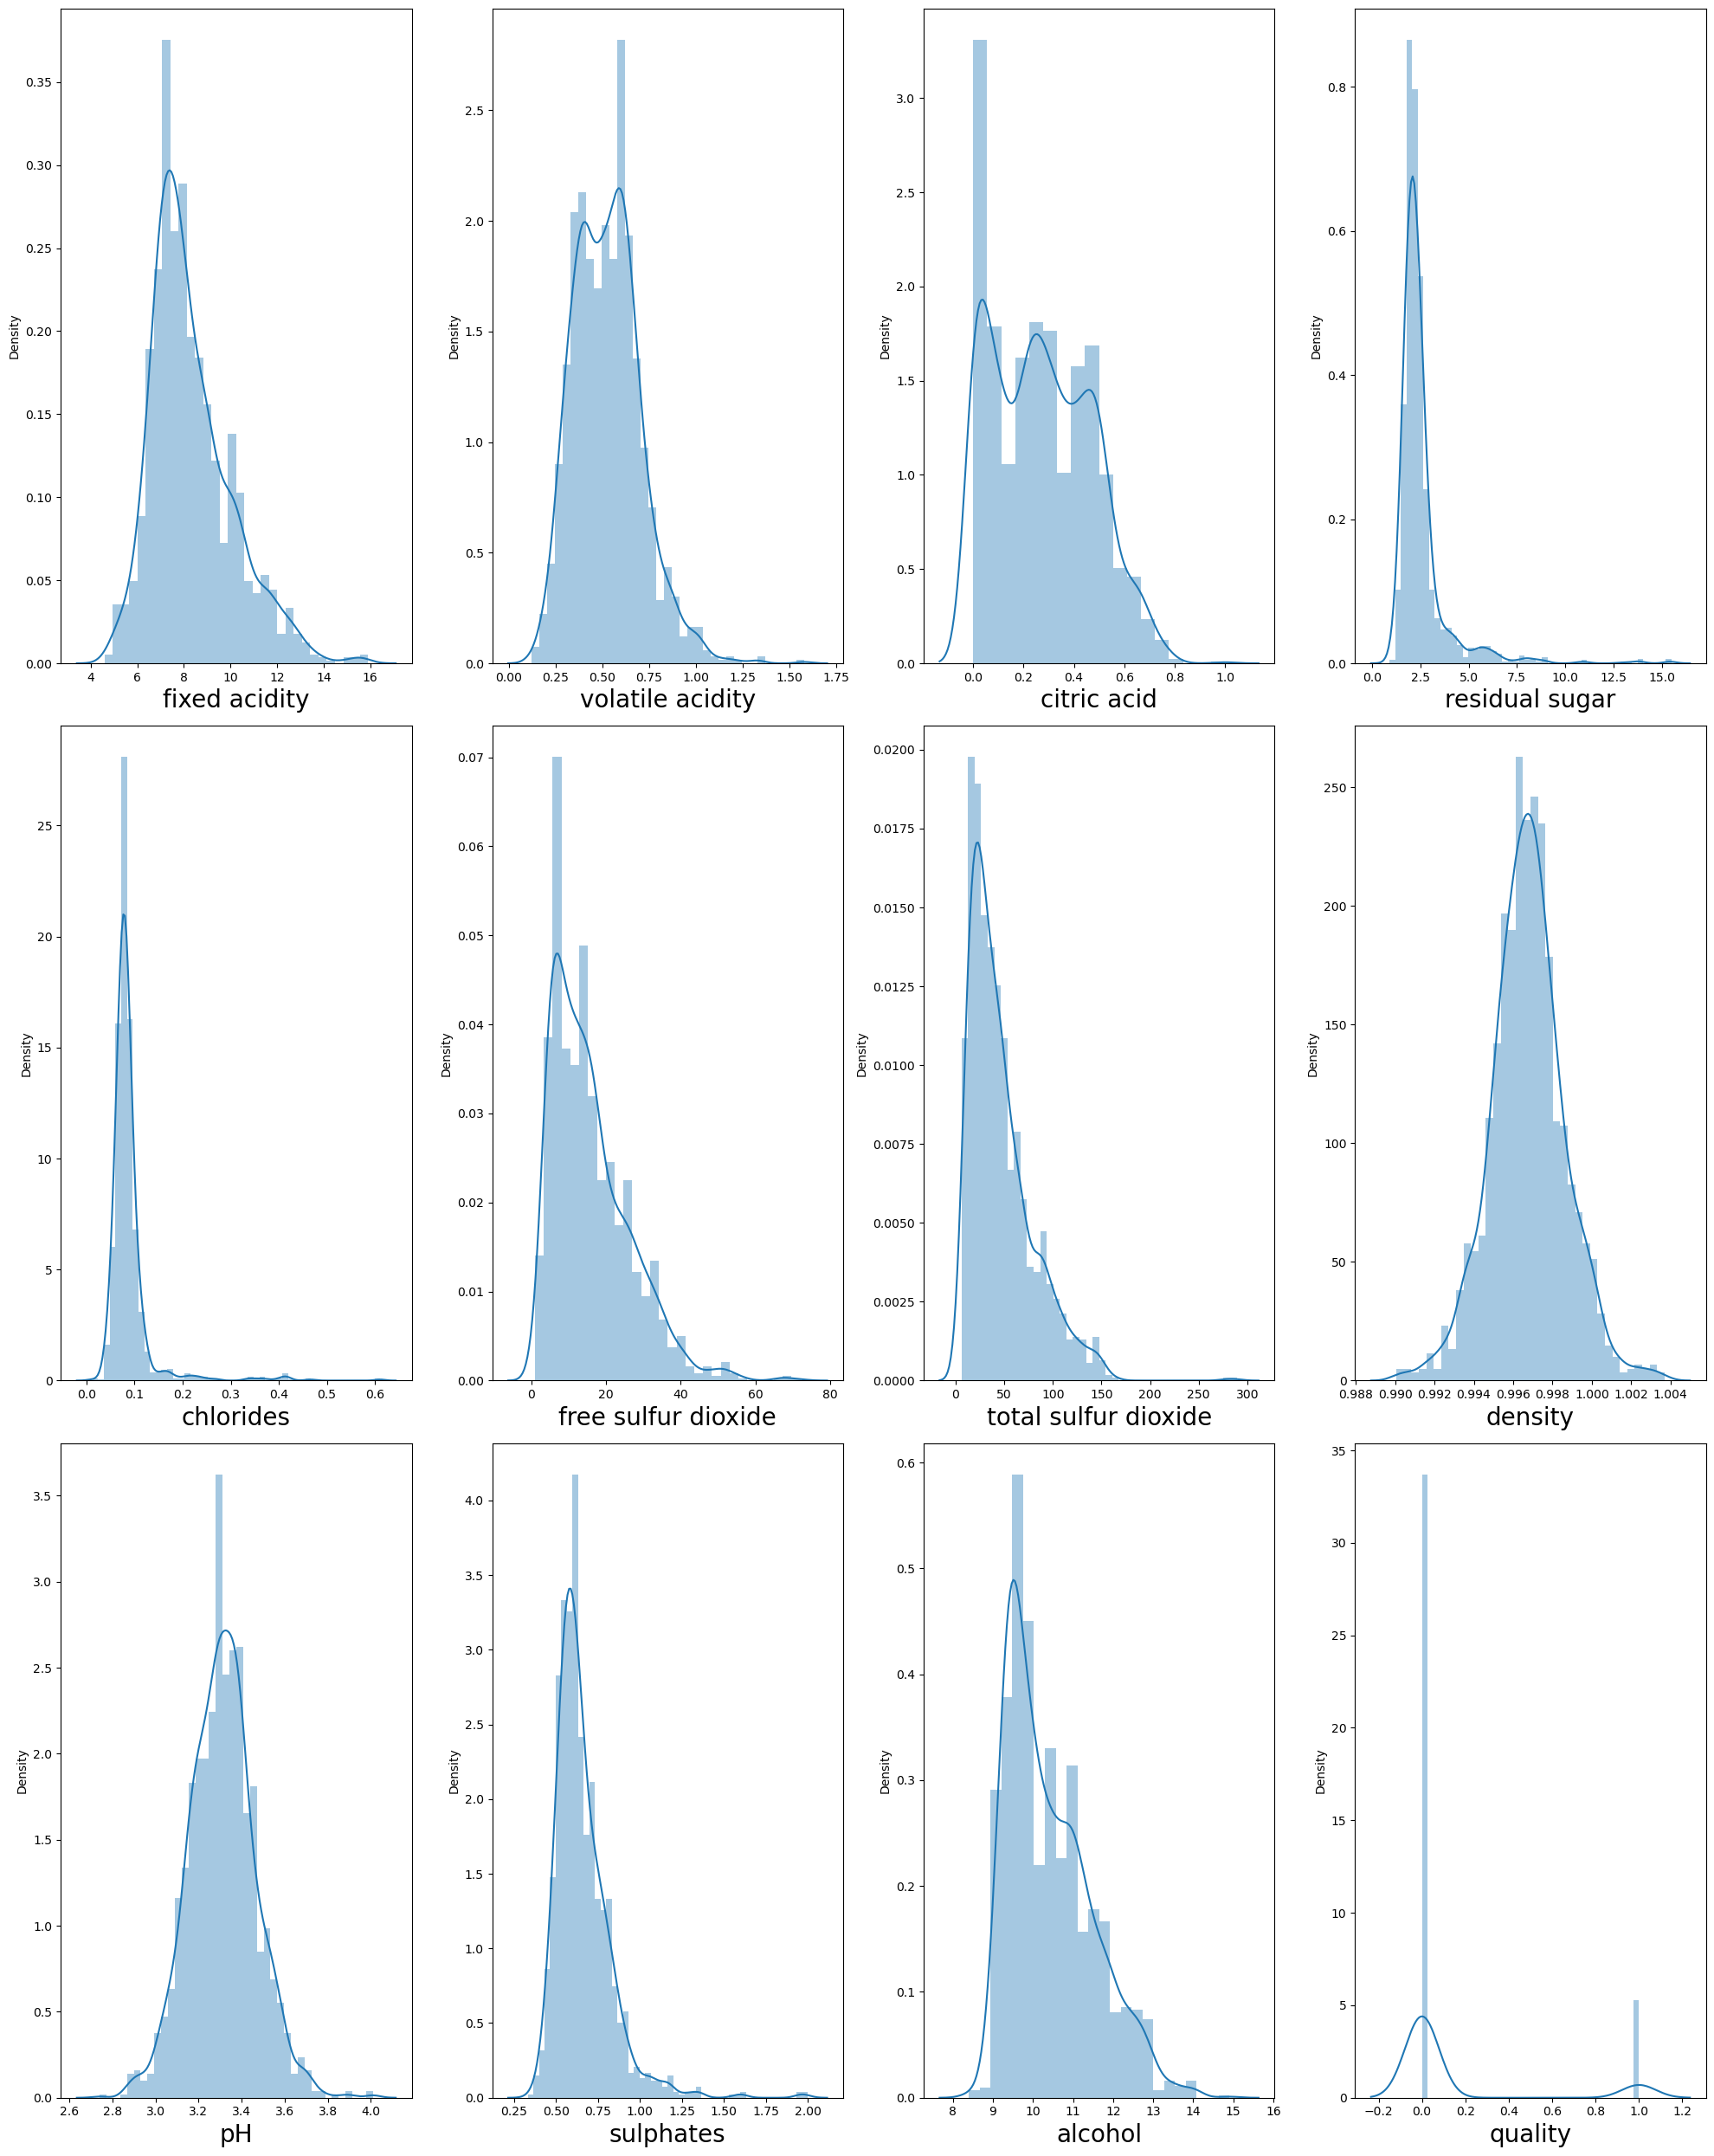

In [122]:
plt.figure(figsize=(20,25),facecolor="w")
plotnumber=1
for i in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

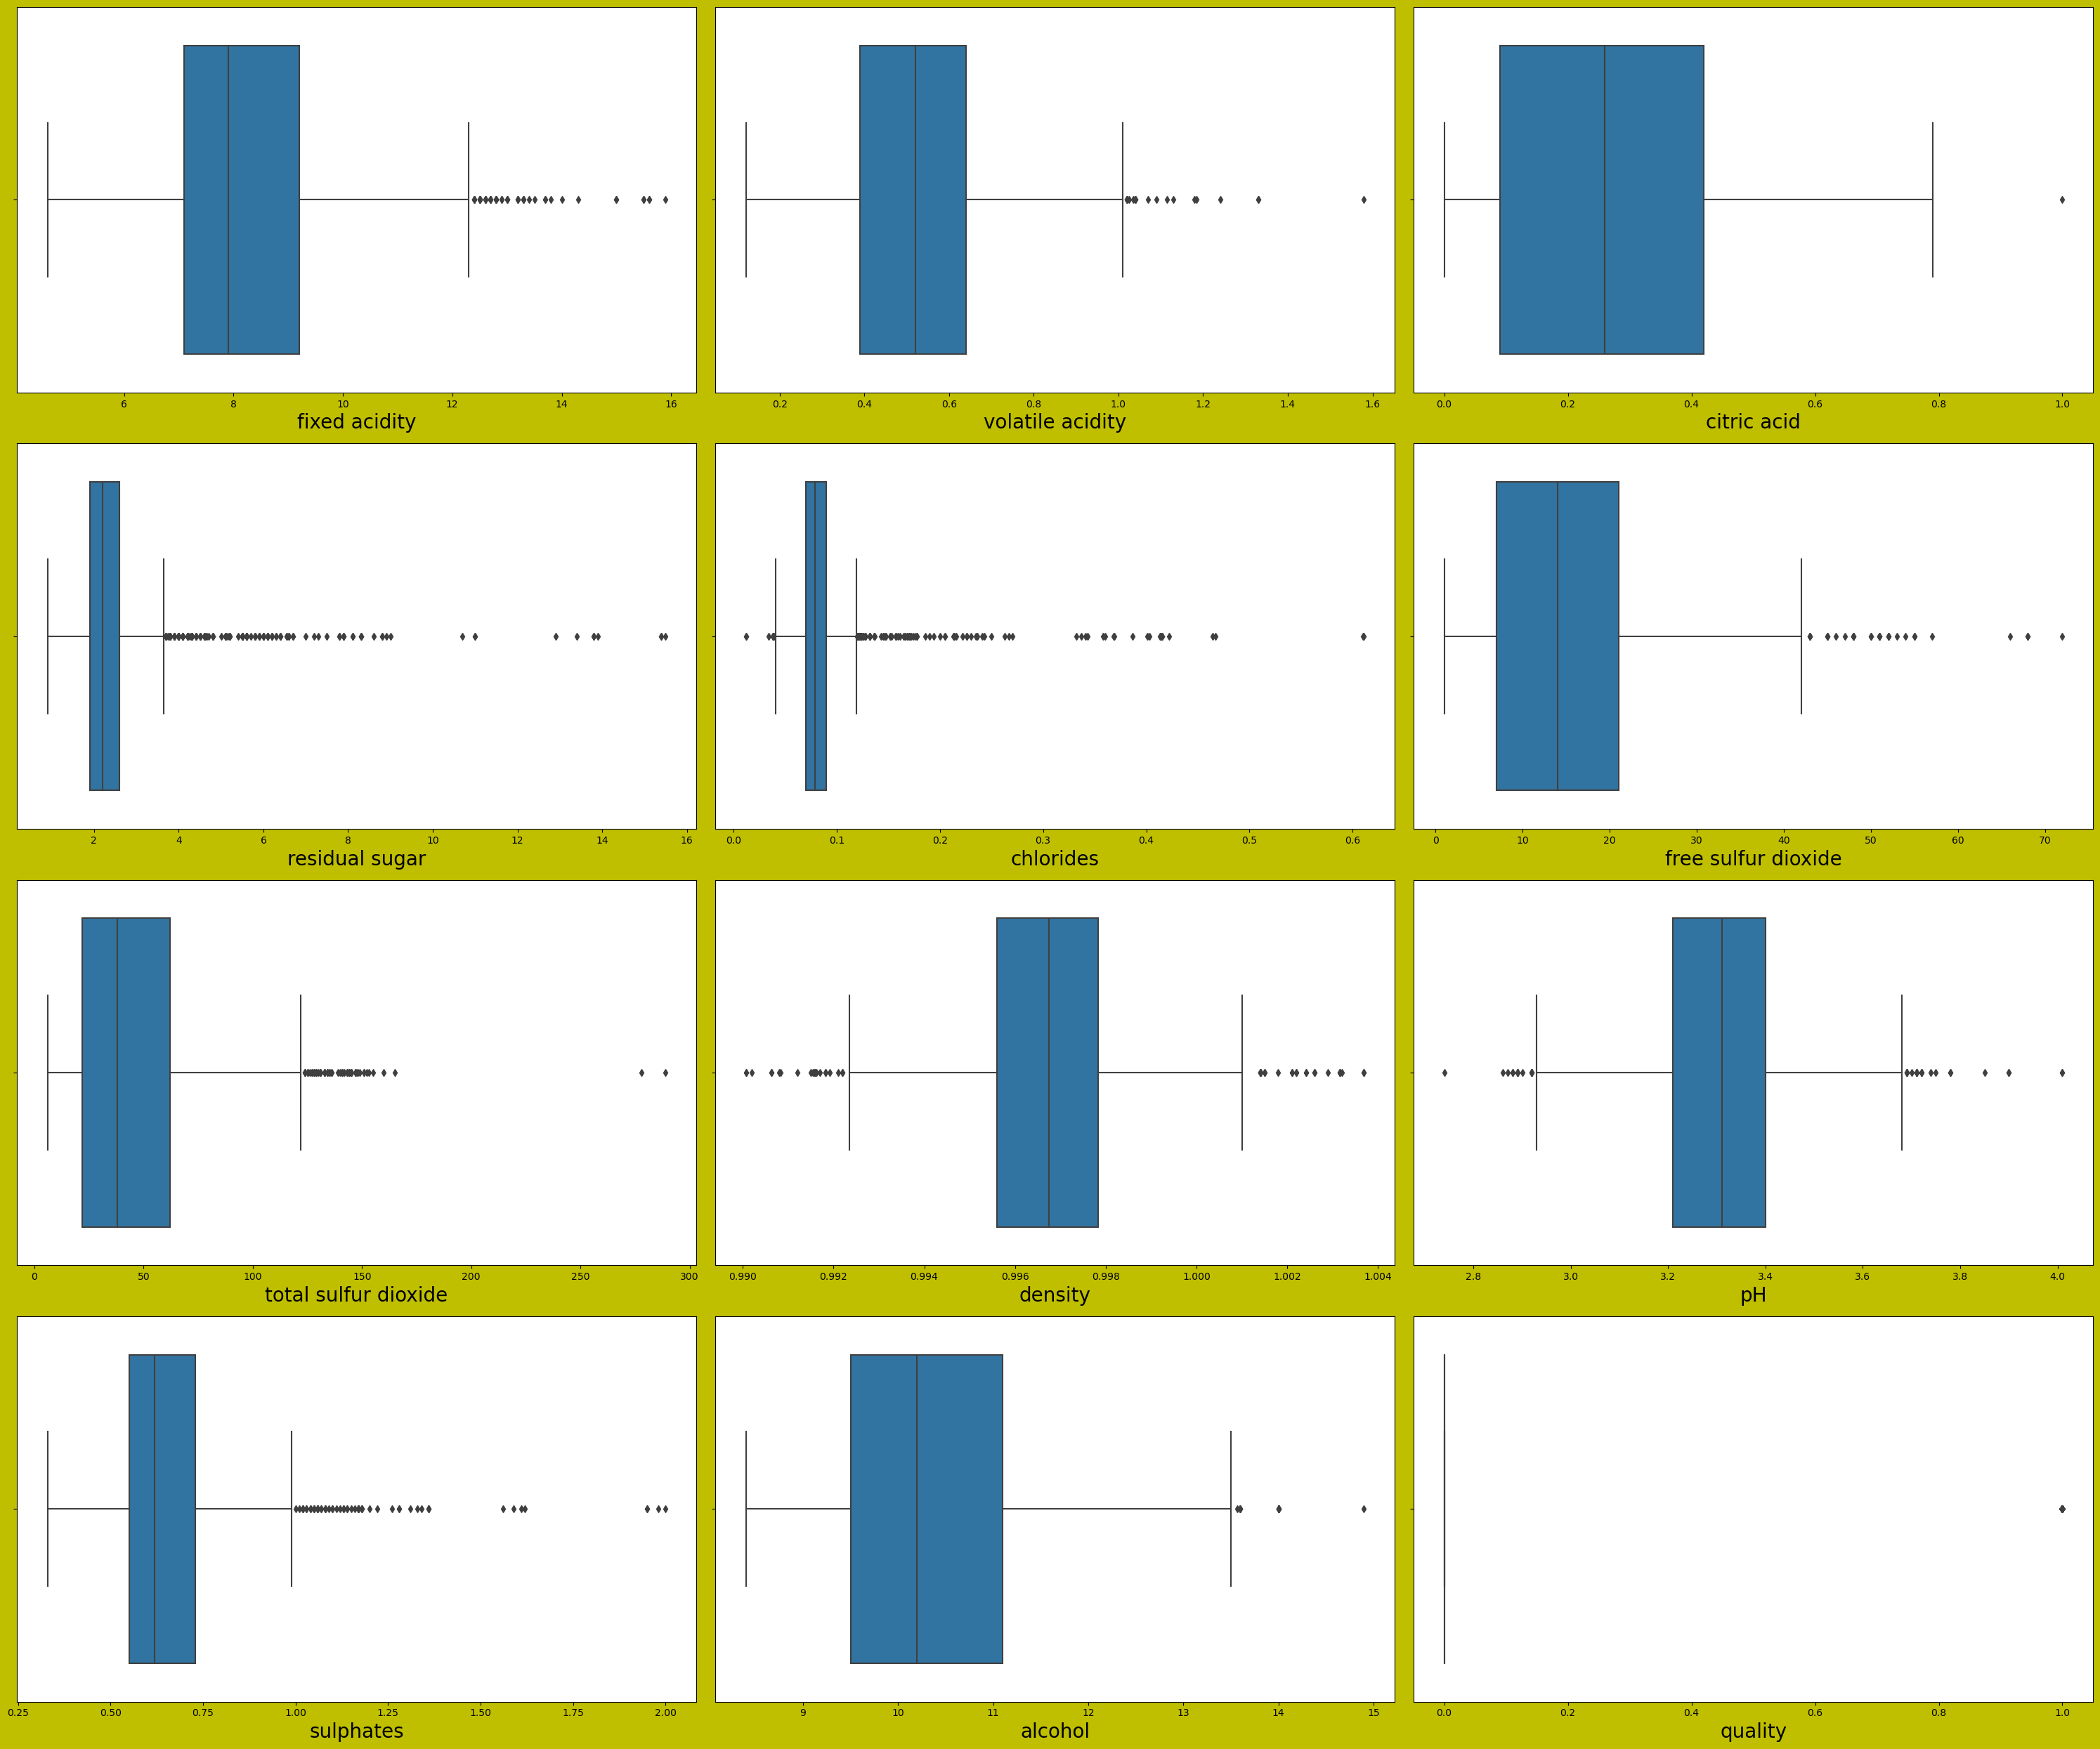

In [123]:
plt.figure(figsize=(30,25),facecolor="y")
graph=1
for i in data:
    if graph<=12:
        ax=plt.subplot(4,3,graph)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

In [124]:
data.rename(columns={"fixed acidity":"fixed_acidity","volatile acidity":"volatile_acidity","citric acid":"citric_acid","residual sugar":"residual_sugar","free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"},inplace=True)

In [125]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [126]:
data['quality'].unique()

array([0, 1], dtype=int64)

In [127]:
q1=data.quantile(.25)
q2=data.quantile(.5)
q3=data.quantile(.75)

In [128]:
iqr=q3-q1

In [129]:
iqr

fixed_acidity            2.100000
volatile_acidity         0.250000
citric_acid              0.330000
residual_sugar           0.700000
chlorides                0.020000
free_sulfur_dioxide     14.000000
total_sulfur_dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  0.000000
dtype: float64

In [130]:
fa_high=q3.fixed_acidity+(1.5*iqr.fixed_acidity)
ind_num=np.where(fa_high<data['fixed_acidity'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1550, 12)

In [131]:
va_high=q3.volatile_acidity+(1.5*iqr.volatile_acidity)
ind_num=np.where(va_high<data["volatile_acidity"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1531, 12)

In [132]:
ca_high=q3.citric_acid+(1.5*iqr.citric_acid)
ind_num=np.where(ca_high<data["citric_acid"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1530, 12)

In [133]:
rs_high=q3.residual_sugar+(1.5*iqr.residual_sugar)
ind_num=np.where(rs_high<data["residual_sugar"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1392, 12)

In [134]:
ch_high=q3.chlorides+(1.5*iqr.chlorides)
ind_num=np.where(ch_high<data["chlorides"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1311, 12)

In [135]:
fsd_high=q3.free_sulfur_dioxide+(1.5*iqr.free_sulfur_dioxide)
ind_num=np.where(fsd_high<data["free_sulfur_dioxide"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1295, 12)

In [136]:
tsd_high=q3.total_sulfur_dioxide+(1.5*iqr.total_sulfur_dioxide)
ind_num=np.where(tsd_high<data["total_sulfur_dioxide"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1259, 12)

In [137]:
den_high=q3.density+(1.5*iqr.density)
ind_num=np.where(den_high<data["density"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1259, 12)

In [138]:
ph_high=q3.pH+(1.5*iqr.pH)
ind_num=np.where(ph_high<data["pH"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1240, 12)

In [139]:
sul_high=q3.sulphates+(1.5*iqr.sulphates)
ind_num=np.where(sul_high<data["sulphates"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1220, 12)

In [140]:
al_high=q3.alcohol+(1.5*iqr.alcohol)
ind_num=np.where(al_high<data['alcohol'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1212, 12)

In [141]:
cl_low=q3.chlorides-(1.5*iqr.chlorides)
ind_num=np.where(cl_low>data['chlorides'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1081, 12)

In [142]:
den_low=q3.density-(1.5*iqr.density)
ind_num=np.where(den_low>data["density"])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(1009, 12)

In [143]:
ph_low=q3.pH-(1.5*iqr.pH)
ind_num=np.where(ph_low>data['pH'])
data=data.drop(data.index[ind_num])
data.reset_index()
data.shape

(949, 12)

In [144]:
data.skew()

fixed_acidity           0.805019
volatile_acidity        0.234823
citric_acid             0.355049
residual_sugar          0.655206
chlorides               0.741437
free_sulfur_dioxide     0.807080
total_sulfur_dioxide    0.909310
density                 0.596727
pH                      0.342221
sulphates               0.726603
alcohol                 0.847986
quality                 2.770102
dtype: float64

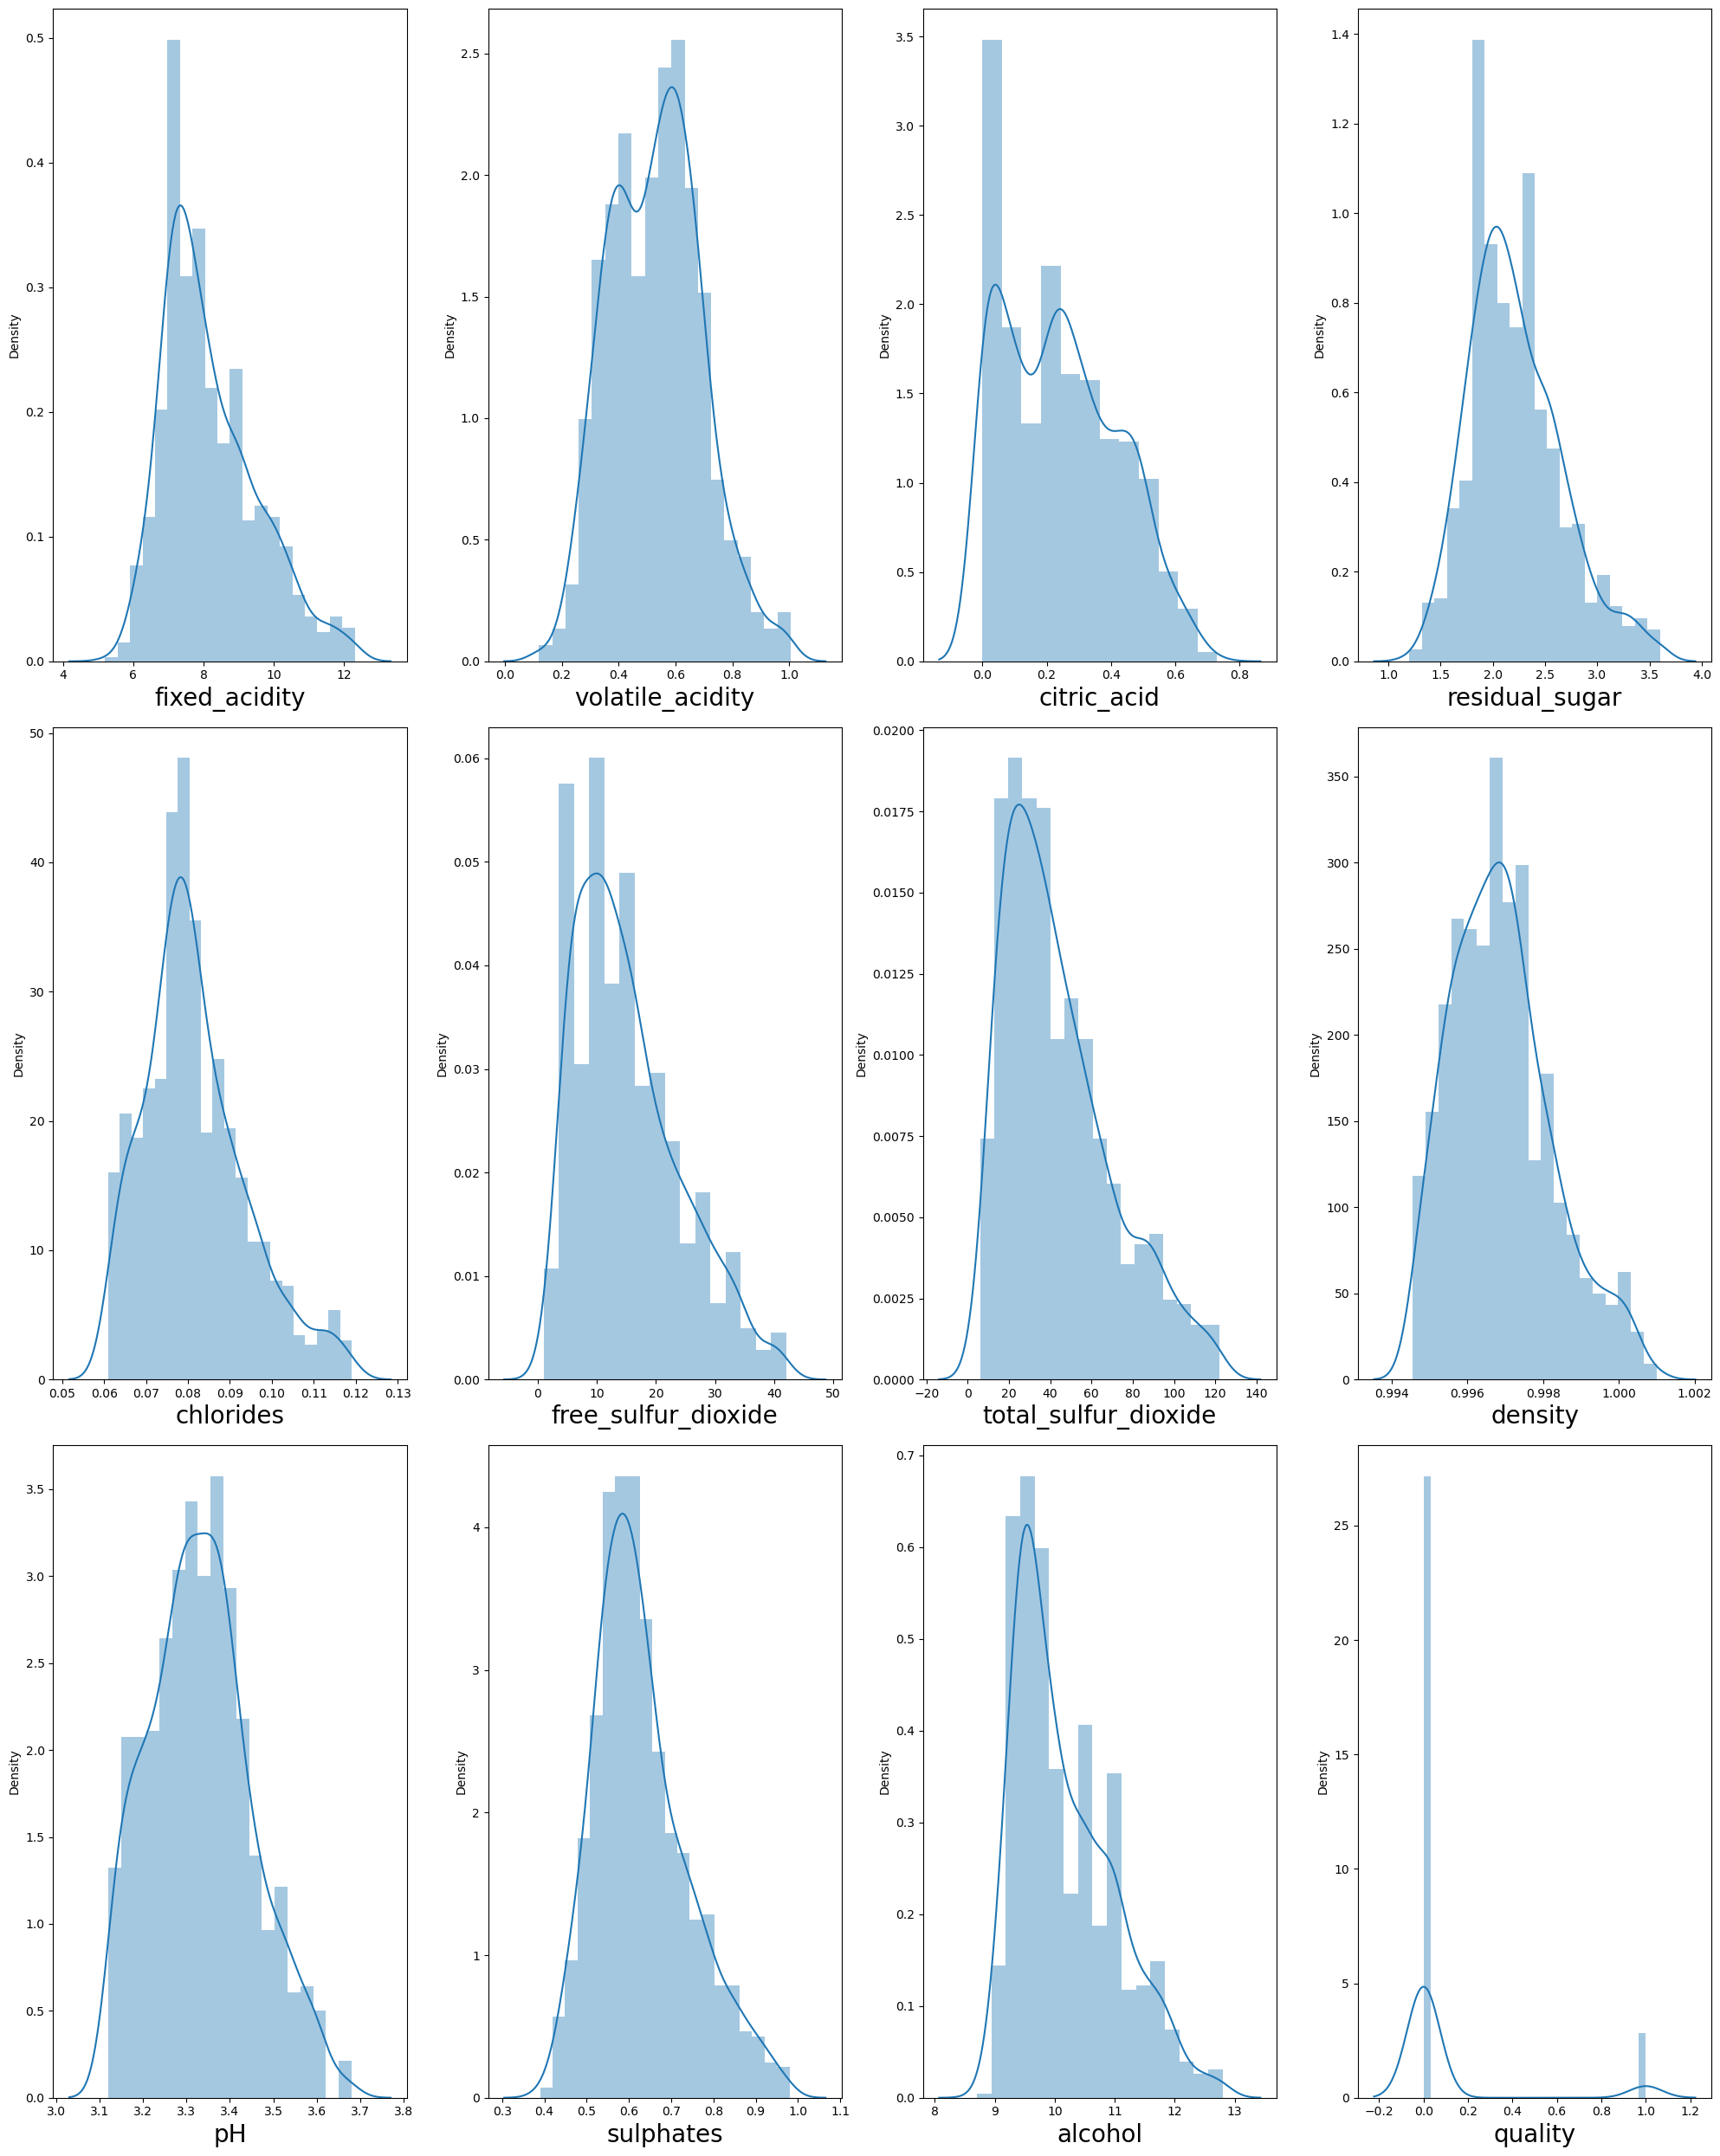

In [145]:
plt.figure(figsize=(20,25),facecolor='w')
graph=1
for i in data:
    if graph<=12:
        ax=plt.subplot(3,4,graph)
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=20)
    graph+=1
plt.tight_layout()

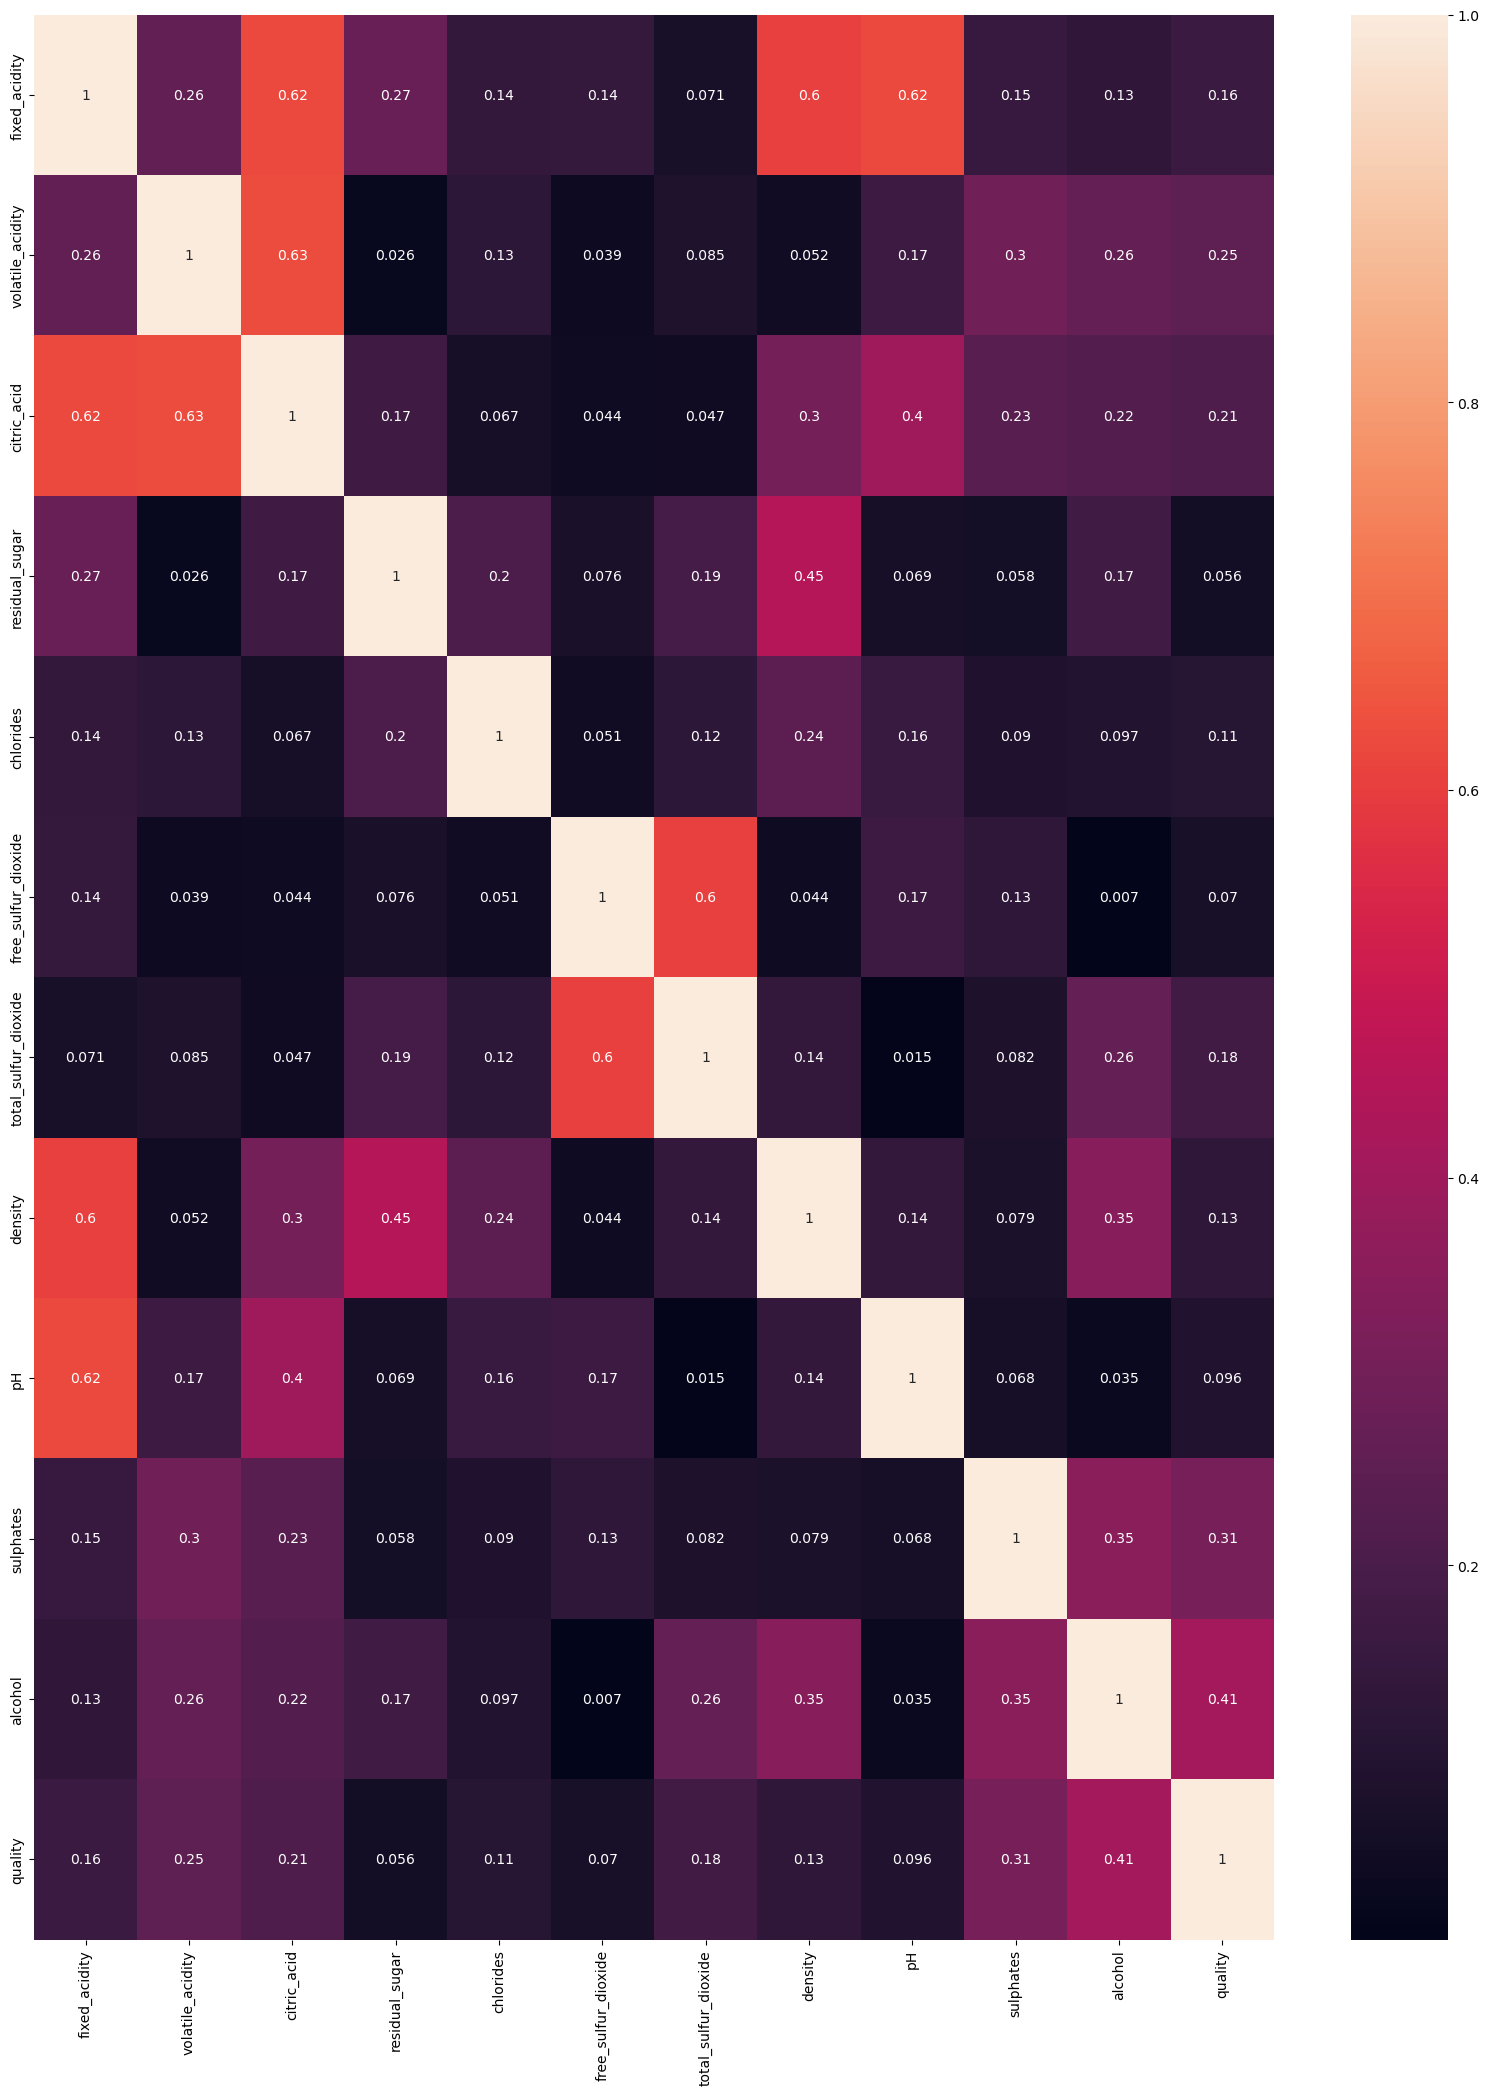

In [146]:
df_corr=data.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,annot=True)
plt.show()

In [147]:
x=data.drop("quality",axis=1)
y=data.quality

In [148]:
x.shape

(949, 11)

In [149]:
y.shape

(949,)

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [152]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [153]:
x_scaled=scaler.fit_transform(x)

In [154]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)  for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif_values,features
0,5.930532,fixed_acidity
1,2.054854,volatile_acidity
2,2.933453,citric_acid
3,1.817121,residual_sugar
4,1.147655,chlorides
5,1.871116,free_sulfur_dioxide
6,2.124693,total_sulfur_dioxide
7,5.228507,density
8,2.703154,pH
9,1.361469,sulphates


In [155]:
x.drop("fixed_acidity",axis=1,inplace=True)

In [156]:
y.value_counts()

0    859
1     90
Name: quality, dtype: int64

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=63)

In [159]:
print(x_train.shape,"-----",x_test.shape,"-----",y_train.shape,"-----",y_test.shape)

(711, 11) ----- (238, 11) ----- (711,) ----- (238,)


In [173]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [174]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [175]:
x_re,y_re=sm.fit_resample(x,y)

In [176]:
y.value_counts()

0    859
1     90
Name: quality, dtype: int64

In [177]:
y_re.value_counts()

0    859
1    859
Name: quality, dtype: int64

In [178]:
x.value_counts()

volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  pH    sulphates  alcohol
0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6       4
0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5       4
0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0       4
0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1       4
0.690             0.07         2.5             0.091      15.0                 21.0                  0.99572  3.38  0.60       11.3       3
                                                                                                                                         ..
0.450             0.34   

In [179]:
x_re.value_counts()

volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density   pH        sulphates  alcohol  
0.360000          0.460000     2.100000        0.074000   24.000000            44.000000             0.995340  3.400000  0.850000   11.000000    31
0.120000          0.450000     1.800000        0.075000   10.000000            21.000000             0.995520  3.410000  0.760000   11.900000    21
0.330000          0.630000     2.800000        0.084000   5.000000             22.000000             0.999800  3.260000  0.740000   11.200000     9
0.580000          0.010000     1.800000        0.088000   12.000000            18.000000             0.995680  3.320000  0.560000   10.500000     9
0.480000          0.320000     2.100000        0.062000   31.000000            54.000000             0.997280  3.300000  0.650000   10.000000     6
                                                                                                                      

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report 

In [181]:
dtc=DecisionTreeClassifier()

In [182]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [183]:
pred_train=dtc.predict(x_train)

In [184]:
accuracy_score(y_train,pred_train)

1.0

In [185]:
pred=dtc.predict(x_test)

In [186]:
accuracy_score(y_test,pred)

0.9201680672268907

In [187]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       212
           1       0.65      0.58      0.61        26

    accuracy                           0.92       238
   macro avg       0.80      0.77      0.78       238
weighted avg       0.92      0.92      0.92       238



In [204]:
param_grid={"criterion":["gini","entropy"],
           "max_depth":range(10,15),
           
           "min_samples_leaf":range(2,5),
           "min_samples_split":range(3,8),
           "max_leaf_nodes":range(5,10),}

In [205]:
from sklearn.model_selection import GridSearchCV

In [206]:
gread_serch=GridSearchCV(estimator=dtc,param_grid=param_grid,cv=5,n_jobs=1)

In [207]:
gread_serch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(3, 8)})

In [198]:
x_train.shape

(711, 11)

In [199]:
y_train.shape

(711,)

In [208]:
best_par=gread_serch.best_params_

In [209]:
best_par

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [210]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=10,max_leaf_nodes=9,min_samples_leaf=4,min_samples_split=3)

In [212]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [216]:
pred_test=dtc.predict(x_test)
pred_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [217]:
accuracy_score(y_test,pred_test)

0.9033613445378151

In [219]:
accuracy_score(y_train,pred_train)

0.9465541490857946

In [220]:
dtc.predict_proba(x_test)

array([[0.97012302, 0.02987698],
       [1.        , 0.        ],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.37931034, 0.62068966],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.37931034, 0.62068966],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [1.        , 0.        ],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.91836735, 0.08163265],
       [1.        , 0.        ],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.15      , 0.85      ],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.97012302, 0.02987698],
       [0.

In [221]:
from sklearn.metrics import roc_curve,roc_auc_score

In [223]:
fpr,tpr,tresholds=roc_curve(y_test,pred_test)

In [224]:
print("fpr",fpr)
print("tpr",tpr)
print("tresholds",tresholds)

fpr [0.         0.04245283 1.        ]
tpr [0.         0.46153846 1.        ]
tresholds [2 1 0]


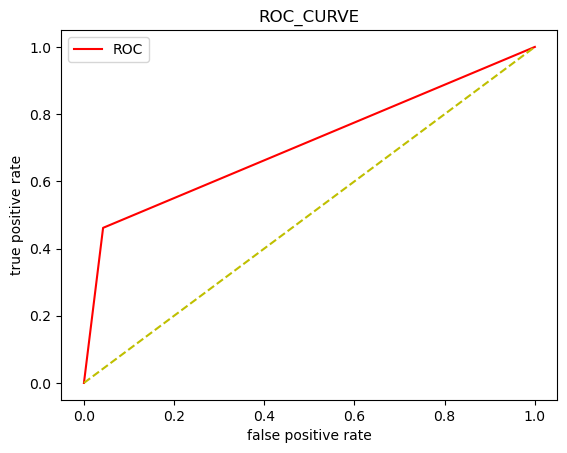

In [232]:
plt.plot(fpr,tpr,label="ROC",color="r")
plt.plot([0,1],[0,1],color="y",linestyle='--')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("ROC_CURVE")
plt.legend()
plt.show()

In [234]:
roc_auc_score(y_test,pred_test)

0.7095428156748912